In [1]:
print('設定Google網路硬碟，本地端不用這幾行語法')
from google.colab import drive
drive.mount('/content/drive', force_remount = True)

設定Google網路硬碟，本地端不用這幾行語法
Mounted at /content/drive


In [2]:
print('載入資料與基本了解')
import pandas as pd
import numpy as np
TB = pd.read_csv('/content/drive/MyDrive/Colab第三階段202505/ch17_20250724/waimai_10k_tw.csv')
print(TB.head())
print(TB.info)

import re
pattern = re.compile('.{1}')
pattern.findall(TB.review[0])
[pattern.findall(s) for s in TB.review]
mydata = [pattern.findall(s) for s in TB.review]
print(mydata[0:2])

載入資料與基本了解
   label           review
0      1     很快，好吃，味道足，量大
1      1     沒有送水沒有送水沒有送水
2      1         非常快，態度好。
3      1  方便，快捷，味道可口，快遞給力
4      1     菜味道很棒！送餐很及時！
<bound method DataFrame.info of        label                                    review
0          1                              很快，好吃，味道足，量大
1          1                              沒有送水沒有送水沒有送水
2          1                                  非常快，態度好。
3          1                           方便，快捷，味道可口，快遞給力
4          1                              菜味道很棒！送餐很及時！
...      ...                                       ...
11982      0                        以前幾乎天天吃，現在調料什麼都不放，
11983      0  昨天訂涼皮兩份，什麼調料都沒有放，就放了點麻油，特別難吃，丟了一份，再也不想吃了
11984      0                                 涼皮太辣,吃不下都
11985      0                              本來遲到了還自己點！！！
11986      0         肉夾饃不錯，羊肉泡饃醬肉包很一般。涼麵沒想像中好吃。送餐倒是很快。

[11987 rows x 2 columns]>
[['很', '快', '，', '好', '吃', '，', '味', '道', '足', '，', '量', '大'], ['沒', '有', '送', '水', '沒', '有', '送', '水', '沒', '有', '

準備進行序列化動作
得到索引與字詞的對應資料
{'，': 1, '了': 2, '的': 3, '不': 4, '送': 5, '！': 6, '。': 7, '是': 8, '好': 9, '一': 10, ',': 11, '吃': 12, '很': 13, '餐': 14, '沒': 15, '還': 16, '點': 17, '有': 18, '時': 19, '個': 20, '太': 21, '我': 22, '到': 23, '都': 24, '小': 25, '就': 26, '味': 27, '也': 28, '道': 29, '度': 30, '快': 31, '菜': 32, '來': 33, '這': 34, '麼': 35, '肉': 36, '錯': 37, '飯': 38, '次': 39, '多': 40, '慢': 41, '給': 42, '1': 43, '子': 44, '說': 45, '要': 46, '差': 47, '下': 48, '家': 49, '？': 50, '以': 51, '大': 52, '在': 53, '可': 54, '裡': 55, '真': 56, '少': 57, '餅': 58, '速': 59, '外': 60, '過': 61, '人': 62, '訂': 63, '…': 64, '話': 65, '後': 66, '0': 67, '兩': 68, '分': 69, '單': 70, '能': 71, '才': 72, '等': 73, '電': 74, '賣': 75, '半': 76, '涼': 77, '2': 78, '上': 79, '打': 80, '員': 81, '難': 82, '服': 83, '量': 84, '再': 85, '別': 86, '常': 87, '面': 88, '般': 89, '間': 90, '天': 91, '辣': 92, '.': 93, '非': 94, '雞': 95, '你': 96, '啊': 97, '會': 98, '但': 99, '豆': 100, '什': 101, '超': 102, '特': 103, '態': 104, '評': 105, '包': 106, '全': 107, '店': 108, '卷':

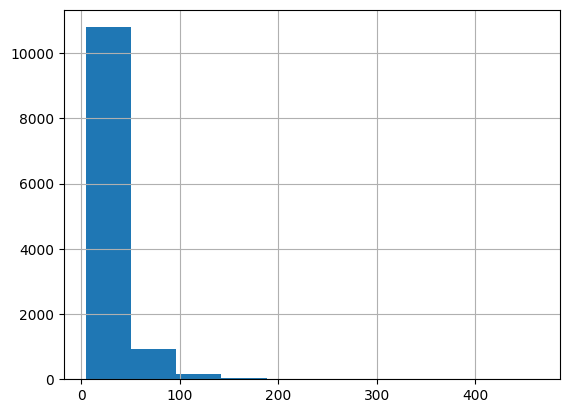

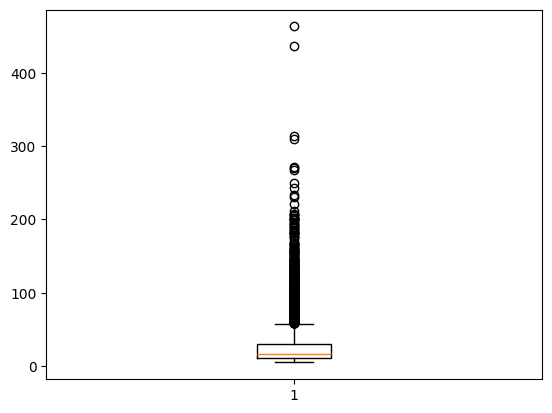

In [3]:
print('準備進行序列化動作')
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(filters = '')
tokenizer.fit_on_texts(mydata)
print('得到索引與字詞的對應資料')
print(tokenizer.word_index)
print('得到字詞與索引的對應資料')
print(tokenizer.index_word)
print('每一串文字轉換為list')
mytxttensor = tokenizer.texts_to_sequences(mydata)
print(mytxttensor[0:2])
print('發現到每一個list長度都會不同')
total = len(mytxttensor)
print('total:', total)
num_max = 0
num_total = 0
num_list = []

for x in range(total):
  if num_max < len(mytxttensor[x]):
    num_max = len(mytxttensor[x])
    if len(mytxttensor[x]) > 30:
      print(mytxttensor[x])
  num_total += len(mytxttensor[x])
  num_list.append(len(mytxttensor[x]))

print('最大字數:', num_max)
print('平均值:', num_total/total)
print('圖表方式呈現')
x1 = np.array(num_list)

import matplotlib.pyplot as plt
plt.hist(x1)
plt.grid()
plt.show()
plt.boxplot(x1)
plt.show()

In [4]:
print('字串的填充與刪除動作')
print('查看原文1:\n', mytxttensor[0:2])
print('查看原文2:\n', mytxttensor[130:131])
mytxttensor1 = pad_sequences(mytxttensor, maxlen = 30, padding='post', truncating='post')
print('查看填充後1-1:\n', mytxttensor1[0:2])
print('查看填充後1-2:\n', mytxttensor1[130:131])
mytxttensor2 = pad_sequences(mytxttensor, maxlen = 30, padding='pre', truncating='pre')
print('查看填充後2-1:\n', mytxttensor2[0:2])
print('查看填充後2-2:\n', mytxttensor2[130:131])

字串的填充與刪除動作
查看原文1:
 [[13, 31, 1, 9, 12, 1, 27, 29, 228, 1, 84, 52], [15, 18, 5, 248, 15, 18, 5, 248, 15, 18, 5, 248]]
查看原文2:
 [[53, 34, 120, 1139, 288, 52, 771, 3, 91, 246, 55, 1, 73, 2, 10, 48, 256, 3, 386, 463, 659, 453, 23, 2, 1, 174, 155, 326, 200, 3, 388, 193, 77, 3, 2, 7, 99, 1665, 129, 157, 281, 244, 3, 1140, 608, 584, 573, 6]]
查看填充後1-1:
 [[ 13  31   1   9  12   1  27  29 228   1  84  52   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [ 15  18   5 248  15  18   5 248  15  18   5 248   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]]
查看填充後1-2:
 [[  53   34  120 1139  288   52  771    3   91  246   55    1   73    2
    10   48  256    3  386  463  659  453   23    2    1  174  155  326
   200    3]]
查看填充後2-1:
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   13  31   1   9  12   1  27  29 228   1  84  52]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   15  18   5 248  15  

建立第一個模型:SimpleRNN，最基本樣式


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.7634 - loss: 0.4992 - val_accuracy: 0.8582 - val_loss: 0.3507
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8781 - loss: 0.3258 - val_accuracy: 0.9341 - val_loss: 0.2222
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.8924 - loss: 0.3025 - val_accuracy: 0.9158 - val_loss: 0.2128
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9042 - loss: 0.2696 - val_accuracy: 0.9433 - val_loss: 0.1780
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9022 - loss: 0.2758 - val_accuracy: 0.8816 - val_loss: 0.3078
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 8ms/step - accuracy: 0.9139 - loss: 0.2402 - val_accuracy: 0.9433 - val_loss: 0.1786
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.9080 - loss: 0.2450 - val_accuracy: 0.8874 - val_loss: 0.3370
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.9155 - lo

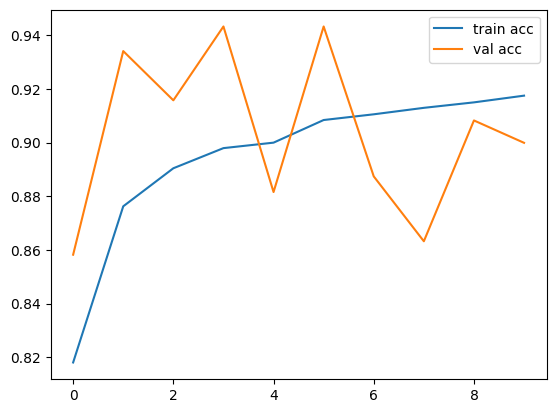

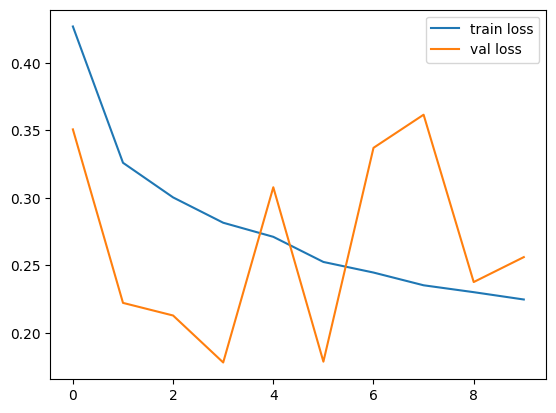

In [5]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第一個模型:SimpleRNN，最基本樣式')
runc = tf.keras.Sequential()
runc.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc.add(layers.SimpleRNN(64))
runc.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc.summary()
print('模型編譯')
runc.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第二個模型:SimpleRNN，最基本樣式，執行部分增加


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_1 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - accuracy: 0.7343 - loss: 0.5263 - val_accuracy: 0.8460 - val_loss: 0.3739
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8755 - loss: 0.3272 - val_accuracy: 0.8565 - val_loss: 0.3878
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8939 - loss: 0.2947 - val_accuracy: 0.8557 - val_loss: 0.3610
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8955 - loss: 0.2869 - val_accuracy: 0.9327 - val_loss: 0.1998
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.9003 - loss: 0.2829 - val_accuracy: 0.7584 - val_loss: 0.5324
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9150 - loss: 0.2410 - val_accuracy: 0.8805 - val_loss: 0.3198
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9150 - loss: 0.2486 - val_accuracy: 0.8632 - val_loss: 0.4387
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9237 - lo

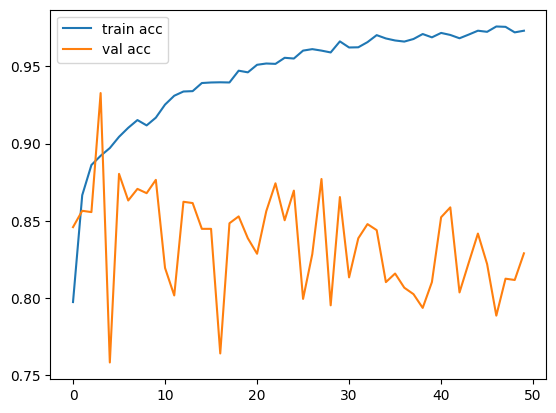

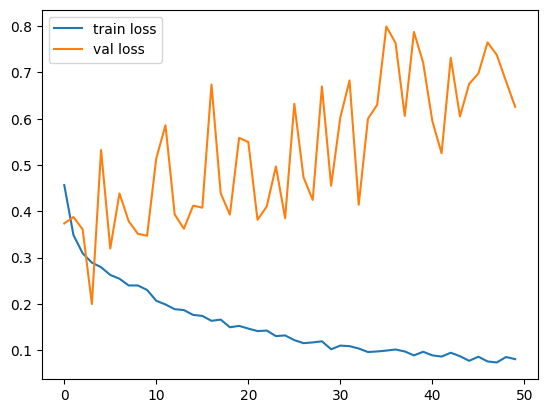

In [6]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第二個模型:SimpleRNN，最基本樣式，執行部分增加')
runc2 = tf.keras.Sequential()
runc2.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc2.add(layers.SimpleRNN(64))
runc2.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc2.summary()
print('模型編譯')
runc2.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc2.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第三個模型:SimpleRNN，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 172ms/step - accuracy: 0.6264 - loss: 0.6313 - val_accuracy: 0.8051 - val_loss: 0.4397
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8217 - loss: 0.4134 - val_accuracy: 0.6981 - val_loss: 0.6726
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.8352 - loss: 0.3763 - val_accuracy: 0.9094 - val_loss: 0.2376
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 226ms/step - accuracy: 0.8784 - loss: 0.3064 - val_accuracy: 0.8846 - val_loss: 0.2981
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 144ms/step - accuracy: 0.8904 - loss: 0.2934 - val_accuracy: 0.8629 - val_loss: 0.3525
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 140ms/step - accuracy: 0.9014 - loss: 0.2677 - val_accuracy: 0.8229 - val_loss: 0.4082
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step - accuracy: 0.9064 - loss: 0.2485 - val_accuracy: 0.8232 - val_loss: 0.4262
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.9085 - loss: 

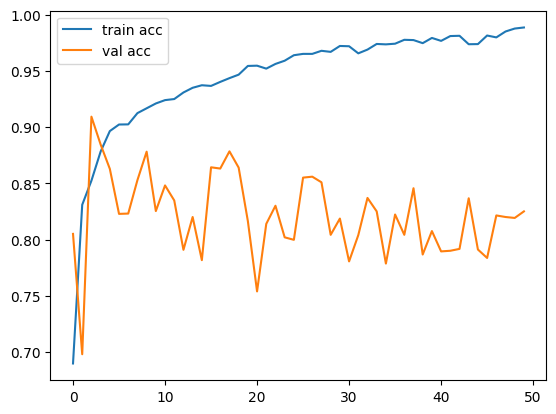

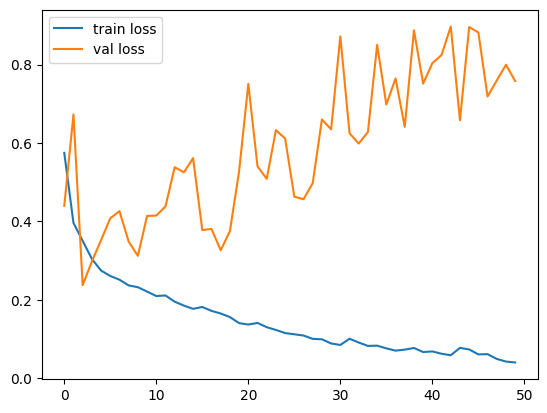

In [7]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第三個模型:SimpleRNN，增加一層layer加上反覆訓練，批次量也增加')
runc3 = tf.keras.Sequential()
runc3.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc3.add(layers.Bidirectional(layers.SimpleRNN(64, return_sequences = True)))
runc3.add(layers.Dropout(0.1))
runc3.add(layers.SimpleRNN(64))
runc3.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc3.summary()
print('模型編譯')
runc3.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc3.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第四個模型:SimpleRNN，神經元增加，驗證比例提高


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_5 (SimpleRNN)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 10s 401ms/step - accuracy: 0.5910 - loss: 0.6665 - val_accuracy: 0.6129 - val_loss: 0.6677
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 293ms/step - accuracy: 0.7582 - loss: 0.5092 - val_accuracy: 0.8471 - val_loss: 0.4017
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 248ms/step - accuracy: 0.8227 - loss: 0.3995 - val_accuracy: 0.8740 - val_loss: 0.3300
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 388ms/step - accuracy: 0.8579 - loss: 0.3457 - val_accuracy: 0.8321 - val_loss: 0.4022
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 9s 297ms/step - accuracy: 0.8792 - loss: 0.3007 - val_accuracy: 0.7339 - val_loss: 0.5883
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 336ms/step - accuracy: 0.8927 - loss: 0.2796 - val_accuracy: 0.7597 - val_loss: 0.5430
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 253ms/step - accuracy: 0.9051 - loss: 0.2548 - val_accuracy: 0.8361 - val_loss: 0.3881
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 4s 250ms/step - accuracy: 0.8975 - loss:

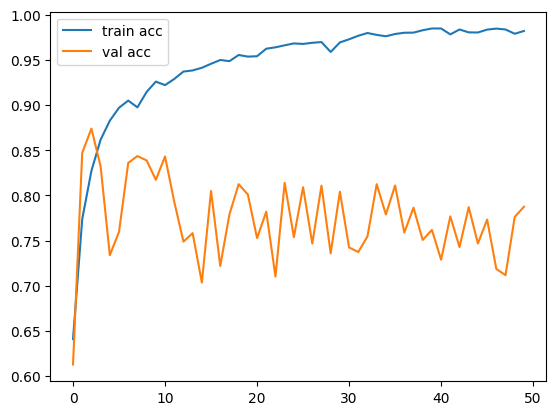

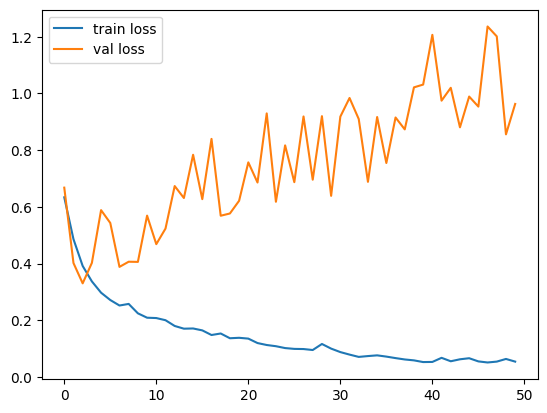

In [8]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第四個模型:SimpleRNN，神經元增加，驗證比例提高')
runc4 = tf.keras.Sequential()
runc4.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc4.add(layers.Bidirectional(layers.SimpleRNN(128, return_sequences = True)))
runc4.add(layers.Dropout(0.1))
runc4.add(layers.SimpleRNN(64))
runc4.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc4.summary()
print('模型編譯')
runc4.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc4.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第5個模型:LSTM，最基本樣式


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 15ms/step - accuracy: 0.7300 - loss: 0.5325 - val_accuracy: 0.8982 - val_loss: 0.2393
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.8773 - loss: 0.3080 - val_accuracy: 0.8757 - val_loss: 0.2617
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8936 - loss: 0.2836 - val_accuracy: 0.9550 - val_loss: 0.1224
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.9000 - loss: 0.2664 - val_accuracy: 0.9333 - val_loss: 0.1940
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9087 - loss: 0.2535 - val_accuracy: 0.9058 - val_loss: 0.2085
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.9108 - loss: 0.2407 - val_accuracy: 0.9399 - val_loss: 0.1647
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.9094 - loss: 0.2487 - val_accuracy: 0.9466 - val_loss: 0.1636
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 7s 14ms/step - accuracy: 0.9

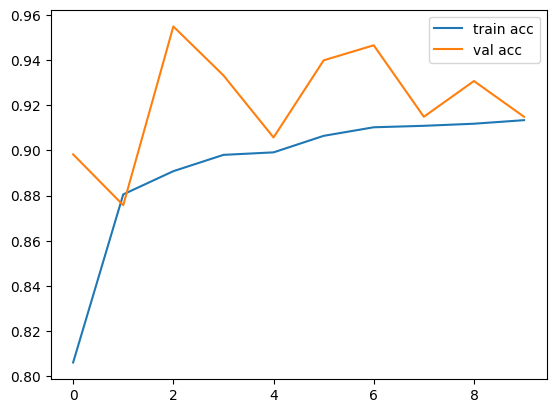

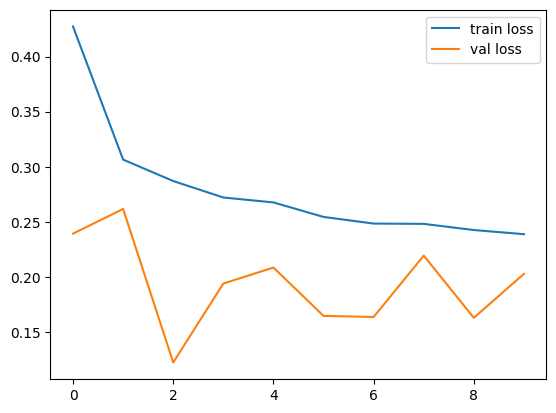

In [9]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第5個模型:LSTM，最基本樣式')
runc5 = tf.keras.Sequential()
runc5.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc5.add(layers.LSTM(64))
runc5.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc5.summary()
print('模型編譯')
runc5.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc5.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第6個模型:LSTM，最基本樣式，執行部分增加


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_5 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 16ms/step - accuracy: 0.6985 - loss: 0.5379 - val_accuracy: 0.8827 - val_loss: 0.3665
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.8672 - loss: 0.3244 - val_accuracy: 0.8907 - val_loss: 0.2954
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8829 - loss: 0.2962 - val_accuracy: 0.8393 - val_loss: 0.3974
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.9008 - loss: 0.2731 - val_accuracy: 0.9066 - val_loss: 0.2858
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 16ms/step - accuracy: 0.8995 - loss: 0.2704 - val_accuracy: 0.8162 - val_loss: 0.4181
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.9105 - loss: 0.2488 - val_accuracy: 0.8693 - val_loss: 0.4013
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9056 - loss: 0.2532 - val_accuracy: 0.7793 - val_loss: 0.5467
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.90

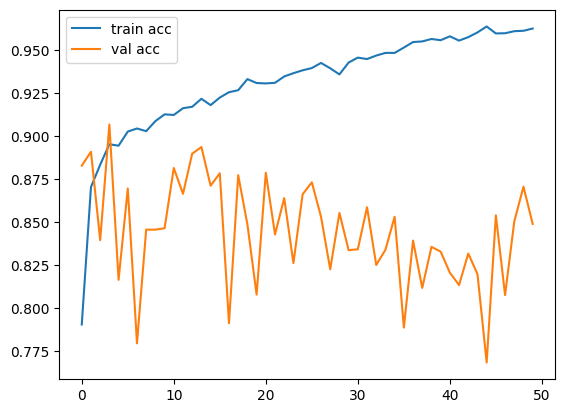

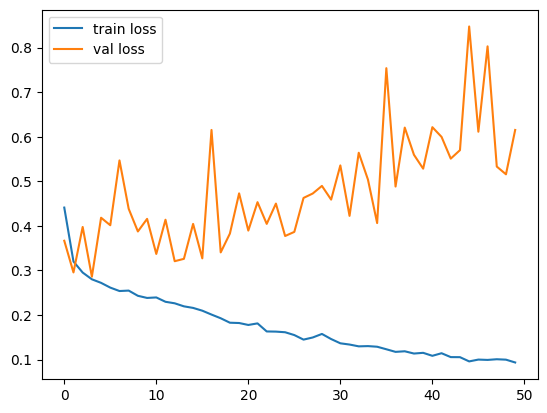

In [10]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第6個模型:LSTM，最基本樣式，執行部分增加')
runc6 = tf.keras.Sequential()
runc6.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc6.add(layers.LSTM(64))
runc6.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc6.summary()
print('模型編譯')
runc6.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc6.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第7個模型:LSTM，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 13s 466ms/step - accuracy: 0.5706 - loss: 0.6812 - val_accuracy: 0.5683 - val_loss: 0.6278
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 350ms/step - accuracy: 0.6886 - loss: 0.5820 - val_accuracy: 0.8059 - val_loss: 0.3895
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 352ms/step - accuracy: 0.8230 - loss: 0.4206 - val_accuracy: 0.8482 - val_loss: 0.3930
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 459ms/step - accuracy: 0.8609 - loss: 0.3443 - val_accuracy: 0.8112 - val_loss: 0.4231
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 351ms/step - accuracy: 0.8672 - loss: 0.3265 - val_accuracy: 0.8521 - val_loss: 0.3636
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 351ms/step - accuracy: 0.8874 - loss: 0.2888 - val_accuracy: 0.8421 - val_loss: 0.4031
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 353ms/step - accuracy: 0.8995 - loss: 0.2684 - val_accuracy: 0.8938 - val_loss: 0.2744
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 491ms/step - accuracy: 0.9001 - lo

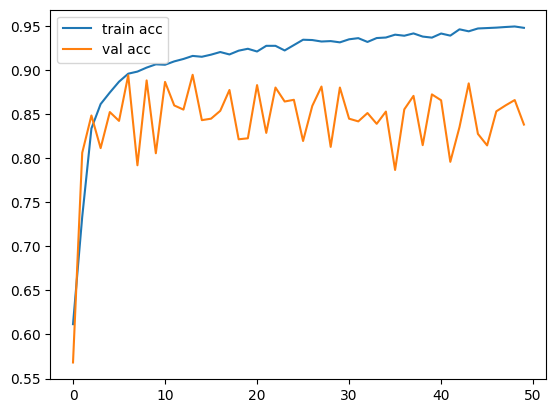

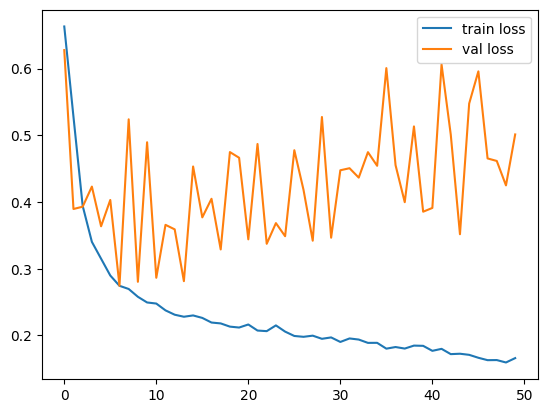

In [11]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第7個模型:LSTM，增加一層layer加上反覆訓練，批次量也增加')
runc7 = tf.keras.Sequential()
runc7.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc7.add(layers.Bidirectional(layers.LSTM(64, return_sequences = True)))
runc7.add(layers.Dropout(0.1))
runc7.add(layers.LSTM(64))
runc7.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc7.summary()
print('模型編譯')
runc7.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc7.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第8個模型:LSTM，神經元增加，驗證比例提高


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_7 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_3 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 870ms/step - accuracy: 0.5797 - loss: 0.6785 - val_accuracy: 0.5441 - val_loss: 0.6720
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 18s 693ms/step - accuracy: 0.6892 - loss: 0.5905 - val_accuracy: 0.7917 - val_loss: 0.4420
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 836ms/step - accuracy: 0.8199 - loss: 0.4188 - val_accuracy: 0.7614 - val_loss: 0.5640
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 933ms/step - accuracy: 0.8465 - loss: 0.3671 - val_accuracy: 0.8117 - val_loss: 0.4623
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 833ms/step - accuracy: 0.8664 - loss: 0.3294 - val_accuracy: 0.8440 - val_loss: 0.3931
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 957ms/step - accuracy: 0.8754 - loss: 0.3106 - val_accuracy: 0.8505 - val_loss: 0.3951
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 783ms/step - accuracy: 0.8951 - loss: 0.2793 - val_accuracy: 0.8578 - val_loss: 0.3909
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 21s 833ms/step - accuracy: 0.8918 

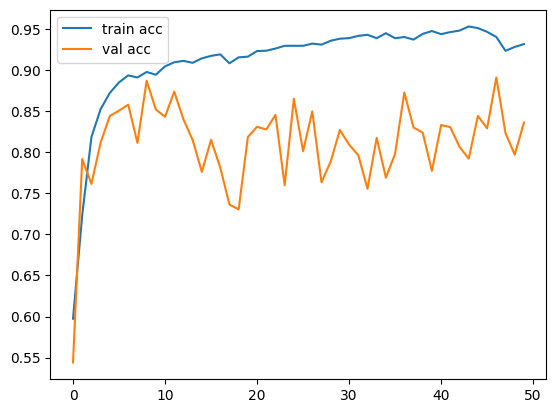

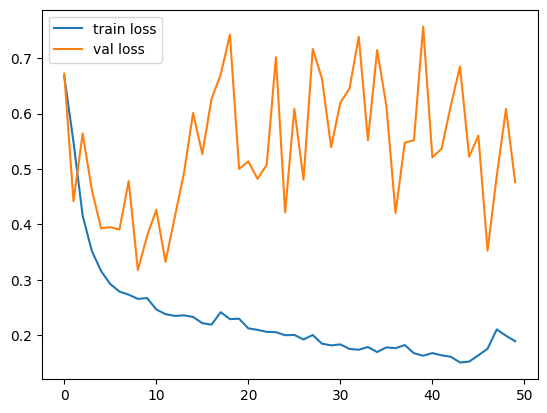

In [12]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第8個模型:LSTM，神經元增加，驗證比例提高')
runc8 = tf.keras.Sequential()
runc8.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc8.add(layers.Bidirectional(layers.LSTM(128, return_sequences = True)))
runc8.add(layers.Dropout(0.1))
runc8.add(layers.LSTM(64))
runc8.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc8.summary()
print('模型編譯')
runc8.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc8.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第9個模型:GRU，最基本樣式


Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 14s 20ms/step - accuracy: 0.6836 - loss: 0.5803 - val_accuracy: 0.9274 - val_loss: 0.1951
Epoch 2/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8802 - loss: 0.3097 - val_accuracy: 0.8899 - val_loss: 0.2815
Epoch 3/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 11s 19ms/step - accuracy: 0.8887 - loss: 0.2932 - val_accuracy: 0.8982 - val_loss: 0.2752
Epoch 4/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.8941 - loss: 0.2822 - val_accuracy: 0.9049 - val_loss: 0.2676
Epoch 5/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 19s 17ms/step - accuracy: 0.9087 - loss: 0.2523 - val_accuracy: 0.9091 - val_loss: 0.2400
Epoch 6/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9099 - loss: 0.2469 - val_accuracy: 0.9249 - val_loss: 0.2095
Epoch 7/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy: 0.9147 - loss: 0.2343 - val_accuracy: 0.8707 - val_loss: 0.3150
Epoch 8/10
540/540 ━━━━━━━━━━━━━━━━━━━━ 10s 19ms/step - accuracy:

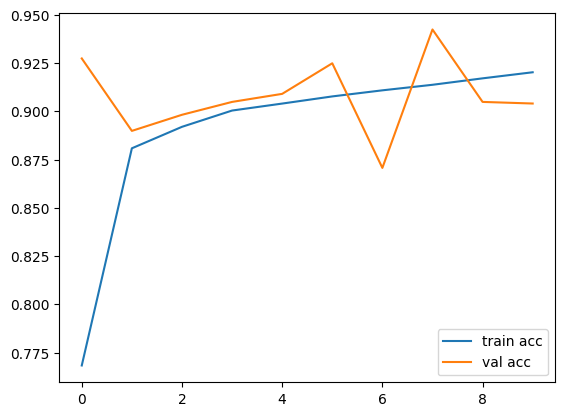

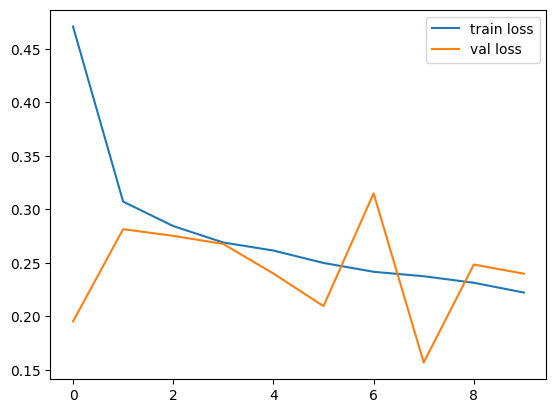

In [13]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第9個模型:GRU，最基本樣式')
runc9 = tf.keras.Sequential()
runc9.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc9.add(layers.GRU(64))
runc9.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc9.summary()
print('模型編譯')
runc9.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc9.fit(mytxttensor1, TB.label, epochs = 10, batch_size = 20, validation_split = 0.1)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第10個模型:GRU，最基本樣式，執行部分增加


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_9 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.6620 - loss: 0.5937 - val_accuracy: 0.8860 - val_loss: 0.3092
Epoch 2/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step - accuracy: 0.8642 - loss: 0.3386 - val_accuracy: 0.8654 - val_loss: 0.3609
Epoch 3/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.8903 - loss: 0.2839 - val_accuracy: 0.7139 - val_loss: 0.7223
Epoch 4/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.8977 - loss: 0.2741 - val_accuracy: 0.7743 - val_loss: 0.5154
Epoch 5/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.8993 - loss: 0.2666 - val_accuracy: 0.8874 - val_loss: 0.2852
Epoch 6/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9055 - loss: 0.2561 - val_accuracy: 0.8749 - val_loss: 0.3079
Epoch 7/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 11s 20ms/step - accuracy: 0.9154 - loss: 0.2383 - val_accuracy: 0.7909 - val_loss: 0.5591
Epoch 8/50
420/420 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9

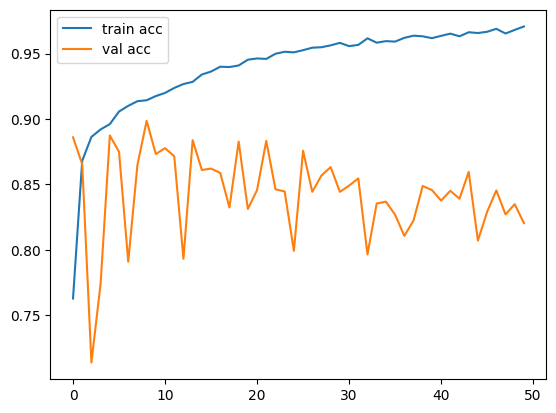

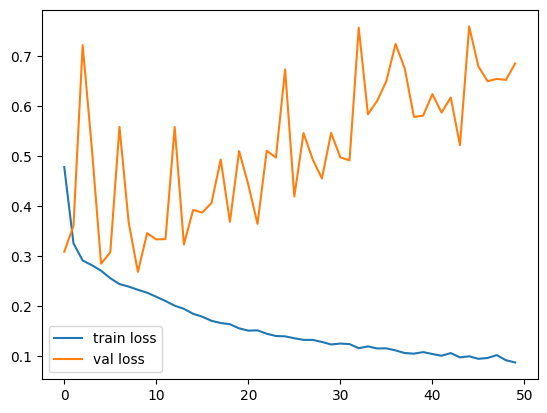

In [14]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第10個模型:GRU，最基本樣式，執行部分增加')
runc10 = tf.keras.Sequential()
runc10.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc10.add(layers.GRU(64))
runc10.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc10.summary()
print('模型編譯')
runc10.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc10.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 20, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第11個模型:GRU，增加一層layer加上反覆訓練，批次量也增加


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_10 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_4 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_3 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 15s 511ms/step - accuracy: 0.5241 - loss: 0.6851 - val_accuracy: 0.3864 - val_loss: 0.7588
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 365ms/step - accuracy: 0.6283 - loss: 0.6436 - val_accuracy: 0.4204 - val_loss: 0.6701
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 484ms/step - accuracy: 0.6431 - loss: 0.6272 - val_accuracy: 0.4918 - val_loss: 0.6204
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 6s 363ms/step - accuracy: 0.6905 - loss: 0.5638 - val_accuracy: 0.7809 - val_loss: 0.4386
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 414ms/step - accuracy: 0.8386 - loss: 0.3796 - val_accuracy: 0.8957 - val_loss: 0.3162
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 524ms/step - accuracy: 0.8680 - loss: 0.3196 - val_accuracy: 0.8874 - val_loss: 0.2926
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 407ms/step - accuracy: 0.8786 - loss: 0.2974 - val_accuracy: 0.8805 - val_loss: 0.3072
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 365ms/step - accuracy: 0.8927 - lo

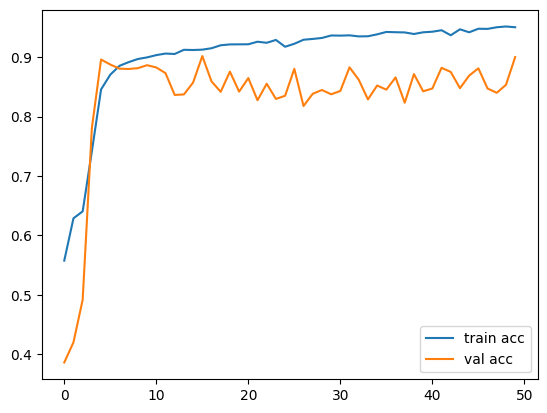

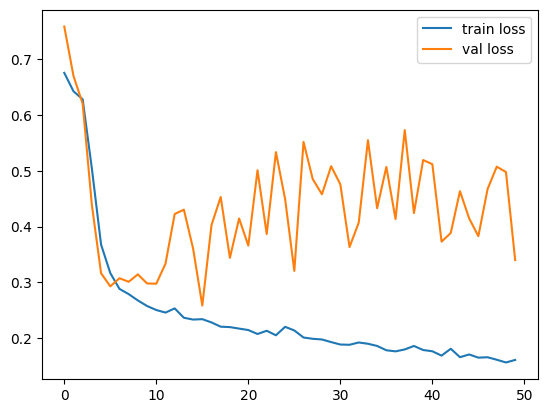

In [15]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第11個模型:GRU，增加一層layer加上反覆訓練，批次量也增加')
runc11 = tf.keras.Sequential()
runc11.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc11.add(layers.Bidirectional(layers.GRU(64, return_sequences = True)))
runc11.add(layers.Dropout(0.1))
runc11.add(layers.GRU(64))
runc11.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc11.summary()
print('模型編譯')
runc11.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc11.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.3)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

建立第12個模型:GRU，神經元增加，驗證比例提高


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_11 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_5 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_5 (GRU)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

模型編譯
模型執行，如果之後用第二個這邊要做修改
Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 794ms/step - accuracy: 0.5193 - loss: 0.6854 - val_accuracy: 0.3393 - val_loss: 0.7852
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 800ms/step - accuracy: 0.6481 - loss: 0.6465 - val_accuracy: 0.3683 - val_loss: 0.8510
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 23s 961ms/step - accuracy: 0.6553 - loss: 0.6343 - val_accuracy: 0.4613 - val_loss: 0.7817
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 19s 873ms/step - accuracy: 0.7071 - loss: 0.5582 - val_accuracy: 0.8077 - val_loss: 0.4749
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 847ms/step - accuracy: 0.8331 - loss: 0.3856 - val_accuracy: 0.7762 - val_loss: 0.5288
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 20s 806ms/step - accuracy: 0.8582 - loss: 0.3354 - val_accuracy: 0.8461 - val_loss: 0.3779
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 12s 810ms/step - accuracy: 0.8789 - loss: 0.2971 - val_accuracy: 0.8311 - val_loss: 0.4417
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 22s 934ms/step - accuracy: 0.8920 

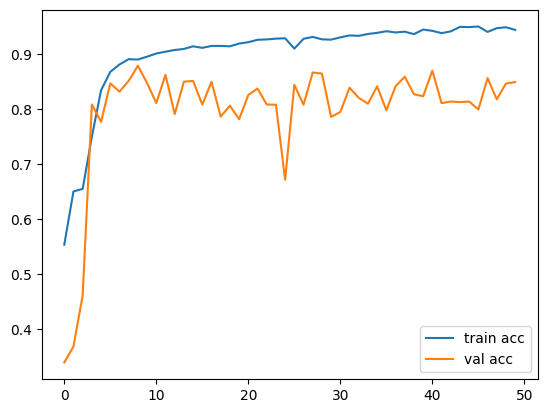

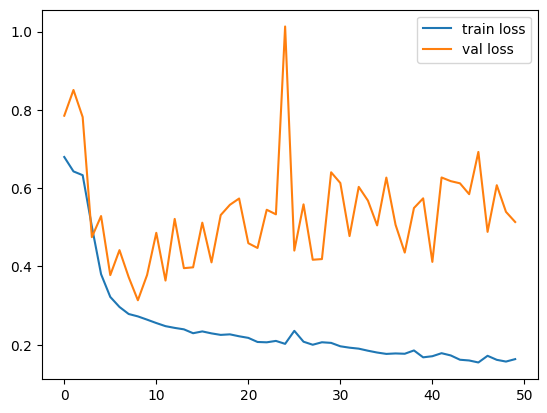

In [16]:
embedding_dim = 5
numwords = len(tokenizer.word_index) + 1

from tensorflow.keras import layers
print('建立第12個模型:GRU，神經元增加，驗證比例提高')
runc12 = tf.keras.Sequential()
runc12.add(layers.Embedding(numwords, embedding_dim, input_length = 30))
runc12.add(layers.Bidirectional(layers.GRU(128, return_sequences = True)))
runc12.add(layers.Dropout(0.1))
runc12.add(layers.GRU(64))
runc12.add(layers.Dense(1, activation='sigmoid'))  # sigmoid是二選一，softmax是多選一
runc12.summary()
print('模型編譯')
runc12.compile(optimizer='adam', loss = tf.losses.BinaryCrossentropy(), metrics = ['accuracy'])
print('模型執行，如果之後用第二個這邊要做修改')
history = runc12.fit(mytxttensor1, TB.label, epochs = 50, batch_size = 500, validation_split = 0.4)

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

In [17]:
print('進行輸入資料後預測，所以輸入的資料也得做轉換')
str1 = input('請輸入一段詞彙')
print('輸入詞彙拆解為一個一個字')
str2 = pattern.findall(str1)
list1 = [str2]
print('每一串文字轉換為list')
mytxttensor4 = tokenizer.texts_to_sequences(list1)
mytxttensor5 = pad_sequences(mytxttensor4, maxlen = 30, padding='post', truncating='post')
print('資料準備好了，要做預測了，0代表負面，1代表正面')
print('SimpleRNN部分')
print(runc.predict(mytxttensor5))
print(runc2.predict(mytxttensor5))
print(runc3.predict(mytxttensor5))
print(runc4.predict(mytxttensor5))
print('LSTM部分')
print(runc5.predict(mytxttensor5))
print(runc6.predict(mytxttensor5))
print(runc7.predict(mytxttensor5))
print(runc8.predict(mytxttensor5))
print('GRU部分')
print(runc9.predict(mytxttensor5))
print(runc10.predict(mytxttensor5))
print(runc11.predict(mytxttensor5))
print(runc12.predict(mytxttensor5))

進行輸入資料後預測，所以輸入的資料也得做轉換
請輸入一段詞彙橘子很好吃但是很酸
輸入詞彙拆解為一個一個字
每一串文字轉換為list
資料準備好了，要做預測了，0代表負面，1代表正面
SimpleRNN部分
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
[[0.9694053]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
[[0.00793013]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
[[0.9983462]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 413ms/step
[[0.2470421]]
LSTM部分


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step
[[0.9114169]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
[[0.9233422]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 453ms/step
[[0.9699348]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 515ms/step
[[0.82619846]]
GRU部分
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step
[[0.8306626]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 315ms/step
[[0.04197724]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 784ms/step
[[0.9626511]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 805ms/step
[[0.96526724]]
